<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Sentiment_Analysis_and_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import math
# import datetime
import re
# import nltk
import warnings
warnings.filterwarnings('ignore')

# from datetime import date, timedelta
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.downloader.download('vader_lexicon')
from textblob import TextBlob

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from google.colab import files
uploaded = files.upload()

Saving economicalSentiments.csv to economicalSentiments.csv
Saving updated-sbl-data.csv to updated-sbl-data.csv


In [51]:
sentiment=pd.read_csv("economicalSentiments.csv")
sentiment.head()

,Date,News Headline,Sentiment,Score
0,2018-06-1,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,2018-06-1,Nepse slides further,Neutral,0.0000
2,2018-06-1,VAT on brokerage service charge scrapped,Neutral,0.0000
3,2018-06-1,"U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,2018-06-1,Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [52]:
sentiment.tail()

,Date,News Headline,Sentiment,Score
743,2018-07-31,Stocks close flat despite improved market acti...,Negative,-0.3724
744,2018-07-31,Taskforce finds organized crime in heli-rescue...,Negative,-0.8020
745,2018-07-31,Hearings committee puts off decision on Joshee,Neutral,0.0000
746,2018-07-31,Is delay in confirming CJ nominee a threat to ...,Negative,-0.6908
747,2018-07-31,Bilateral mechanism active to implement Nepal-...,Positive,0.4939


In [53]:
sentiment.drop('Date', axis=1, inplace=True)

In [54]:
sentiment.shape

(748, 3)

In [55]:
# sentiment.set_index("Date", inplace=True)
# sentiment

In [56]:
data=pd.read_csv("updated-sbl-data.csv")
data.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


In [57]:
data.tail()

,Date,Open,High,Low,Ltp,Turnover
1995,2013-03-21,306.00,311.00,303.00,308.00,"821,123.00"
1996,2013-03-20,312.00,312.00,306.00,306.00,"261,298.00"
1997,2013-03-19,311.00,312.00,309.00,312.00,"663,393.00"
1998,2013-03-18,315.00,317.00,305.00,311.00,"897,326.00"
1999,2013-03-17,321.00,320.00,310.00,315.00,"796,657.00"


In [58]:
# data.set_index('Date', inplace=True)
# data

In [59]:
data.shape

(2000, 6)

In [60]:
df = pd.concat([data, sentiment], axis=1, join='inner')

In [61]:
df

,Date,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20",Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70",Nepse slides further,Neutral,0.0000
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50",VAT on brokerage service charge scrapped,Neutral,0.0000
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10","U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80",Minister of State Baskota calls for proper gui...,Neutral,0.0000
...,...,...,...,...,...,...,...,...,...
743,2019-03-06,274.00,279.00,274.00,279.00,"1,530,383.00",Stocks close flat despite improved market acti...,Negative,-0.3724
744,2019-03-05,274.00,278.00,273.00,276.00,"2,026,995.00",Taskforce finds organized crime in heli-rescue...,Negative,-0.8020
745,2019-03-03,278.00,278.00,274.00,274.00,"2,795,918.00",Hearings committee puts off decision on Joshee,Neutral,0.0000
746,2019-02-27,275.00,278.00,275.00,277.00,"1,228,521.00",Is delay in confirming CJ nominee a threat to ...,Negative,-0.6908


In [62]:
df.set_index('Date',inplace=True)

In [63]:
df

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score
Date,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20",Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70",Nepse slides further,Neutral,0.0000
2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50",VAT on brokerage service charge scrapped,Neutral,0.0000
2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10","U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80",Minister of State Baskota calls for proper gui...,Neutral,0.0000
...,...,...,...,...,...,...,...,...
2019-03-06,274.00,279.00,274.00,279.00,"1,530,383.00",Stocks close flat despite improved market acti...,Negative,-0.3724
2019-03-05,274.00,278.00,273.00,276.00,"2,026,995.00",Taskforce finds organized crime in heli-rescue...,Negative,-0.8020
2019-03-03,278.00,278.00,274.00,274.00,"2,795,918.00",Hearings committee puts off decision on Joshee,Neutral,0.0000


**Visualise Last Trading Price and Turnover**

In [64]:
df.head()

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score
Date,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20",Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70",Nepse slides further,Neutral,0.0000
2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50",VAT on brokerage service charge scrapped,Neutral,0.0000
2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10","U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80",Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [65]:
df["Ltp"] = df["Ltp"].str.replace(",","")
ltp = df["Ltp"].apply(lambda x: float(x))
df["Ltp"]=df["Ltp"].apply(pd.to_numeric)


df["Open"] = df["Open"].str.replace(",","")
open = df["Open"].apply(lambda x: float(x))

df["High"] = df["High"].str.replace(",","")
high = df["High"].apply(lambda x: float(x))

df["Low"] = df["Low"].str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

df["Turnover"] = df["Turnover"].str.replace(",","")
turnover = df["Turnover"].apply(lambda x: float(x))

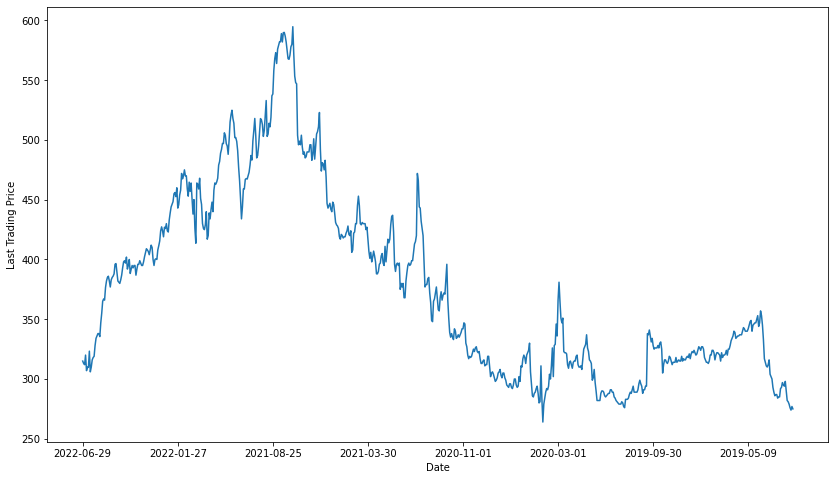

In [67]:
df['Ltp'].plot(figsize=(14,8))
plt.ylabel("Last Trading Price")
plt.show()

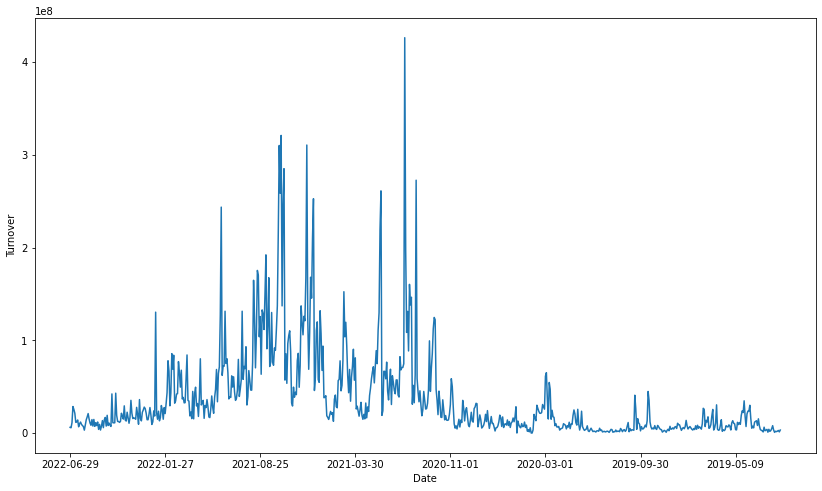

In [69]:
turnover.plot(figsize=(14,8))
plt.ylabel("Turnover")
plt.show()

In [70]:
df['News Headline'].iloc[0]

'Mustard oil to become dearer by Rs 15 per liter'

In [71]:
# Iterate over rows in combined news column

for index, row in df.iterrows(): 
    print (row["News Headline"])

Mustard oil to become dearer by Rs 15 per liter
Nepse slides further
VAT on brokerage service charge scrapped
U.S. allies hit back at Washington's steel, aluminum tariffs
Minister of State Baskota calls for proper guidance of cooperatives
RJPN leaders hint at change in power equation in Province 2
President appoints two ministers representing FSFN
Road mania grips local levels: Over half of budget for road projects
More Indians come to Nepal after Modi visit
Road mania grips local levels: Over half of budget for road projects
Government restores practice of 3-year expenditure plans
‘With more mountaineers, Everest is losing its dignity’
FHAN lauds government efforts to promote handicraft sector
Himalayan Travel Mart 2018 kicks off
Nepse ends week lower despite pre-budget surge
NOC hikes fuel price
Baskota promoted to Minister for Communication and Information Technology
With FSFN on board, Oli govt has two-thirds majority
Budget gives Rs 730m for tourism infrastructure
Sugar mill takes

**Clean data in News Headling column**

In [72]:
clean_news = []

for i in range(0, len(df["News Headline"])): 
    clean_news.append(re.sub("\n", ' ', df["News Headline"][i]))  # replace n\ with ' '
    clean_news[i] = re.sub(r'[^a-zA-z0-9\s]','',clean_news[i]) # removes all than alphabets and numbers

In [73]:
# Show first row in cleaned combined news column

clean_news[0]

'Mustard oil to become dearer by Rs 15 per liter'

In [74]:
df['News Headline'].iloc[0]

'Mustard oil to become dearer by Rs 15 per liter'

In [75]:
df['News Headline'] = clean_news 

In [76]:
df

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score
Date,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.0,6127716.20,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
2022-06-28,312.00,316.50,306.00,313.0,5707986.70,Nepse slides further,Neutral,0.0000
2022-06-27,322.00,325.00,310.00,312.0,11125995.50,VAT on brokerage service charge scrapped,Neutral,0.0000
2022-06-26,312.90,320.00,308.00,320.0,28577745.10,US allies hit back at Washingtons steel alumin...,Neutral,0.0000
2022-06-24,305.00,310.00,298.20,307.0,25399389.80,Minister of State Baskota calls for proper gui...,Neutral,0.0000
...,...,...,...,...,...,...,...,...
2019-03-06,274.00,279.00,274.00,279.0,1530383.00,Stocks close flat despite improved market acti...,Negative,-0.3724
2019-03-05,274.00,278.00,273.00,276.0,2026995.00,Taskforce finds organized crime in helirescue ...,Negative,-0.8020
2019-03-03,278.00,278.00,274.00,274.0,2795918.00,Hearings committee puts off decision on Joshee,Neutral,0.0000


**Sentiment Analysis** <br>
TextBlob will be used to get subjectivity and polarity scores for the cleaned and merged news data. Polarity is a float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgement whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1] where 0 is objective and 1 is subjective.

In [77]:
# Create function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [78]:
# Create new columns
df['subjectivity'] = df['News Headline'].apply(getSubjectivity)
df['polarity'] = df['News Headline'].apply(getPolarity)

In [79]:
df

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score,subjectivity,polarity
Date,,,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.0,6127716.20,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404,0.000,0.000000
2022-06-28,312.00,316.50,306.00,313.0,5707986.70,Nepse slides further,Neutral,0.0000,0.500,0.000000
2022-06-27,322.00,325.00,310.00,312.0,11125995.50,VAT on brokerage service charge scrapped,Neutral,0.0000,0.000,0.000000
2022-06-26,312.90,320.00,308.00,320.0,28577745.10,US allies hit back at Washingtons steel alumin...,Neutral,0.0000,0.000,0.000000
2022-06-24,305.00,310.00,298.20,307.0,25399389.80,Minister of State Baskota calls for proper gui...,Neutral,0.0000,0.100,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-03-06,274.00,279.00,274.00,279.0,1530383.00,Stocks close flat despite improved market acti...,Negative,-0.3724,0.125,-0.025000
2019-03-05,274.00,278.00,273.00,276.0,2026995.00,Taskforce finds organized crime in helirescue ...,Negative,-0.8020,0.000,0.000000
2019-03-03,278.00,278.00,274.00,274.0,2795918.00,Hearings committee puts off decision on Joshee,Neutral,0.0000,0.000,0.000000


In [80]:
df.shape

(748, 10)

In [81]:
# "1" when  Ltp value rose or stayed as the same;
# "0" when Ltp value decreased.

df['Ltp Next Value'] = df['Ltp'].shift(-1)

In [82]:
df

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score,subjectivity,polarity,Ltp Next Value
Date,,,,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.0,6127716.20,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404,0.000,0.000000,313.0
2022-06-28,312.00,316.50,306.00,313.0,5707986.70,Nepse slides further,Neutral,0.0000,0.500,0.000000,312.0
2022-06-27,322.00,325.00,310.00,312.0,11125995.50,VAT on brokerage service charge scrapped,Neutral,0.0000,0.000,0.000000,320.0
2022-06-26,312.90,320.00,308.00,320.0,28577745.10,US allies hit back at Washingtons steel alumin...,Neutral,0.0000,0.000,0.000000,307.0
2022-06-24,305.00,310.00,298.20,307.0,25399389.80,Minister of State Baskota calls for proper gui...,Neutral,0.0000,0.100,0.000000,310.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-06,274.00,279.00,274.00,279.0,1530383.00,Stocks close flat despite improved market acti...,Negative,-0.3724,0.125,-0.025000,276.0
2019-03-05,274.00,278.00,273.00,276.0,2026995.00,Taskforce finds organized crime in helirescue ...,Negative,-0.8020,0.000,0.000000,274.0
2019-03-03,278.00,278.00,274.00,274.0,2795918.00,Hearings committee puts off decision on Joshee,Neutral,0.0000,0.000,0.000000,277.0


In [83]:
df['Label'] = df.apply(lambda x: 1 if (x['Ltp Next Value']>= x['Ltp']) else 0, axis =1)

df[['Ltp', 'Ltp Next Value', 'Label']].head(5)

,Ltp,Ltp Next Value,Label
Date,,,
2022-06-29,315.0,313.0,0
2022-06-28,313.0,312.0,0
2022-06-27,312.0,320.0,1
2022-06-26,320.0,307.0,0
2022-06-24,307.0,310.0,1


In [84]:
df

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score,subjectivity,polarity,Ltp Next Value,Label
Date,,,,,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.0,6127716.20,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404,0.000,0.000000,313.0,0
2022-06-28,312.00,316.50,306.00,313.0,5707986.70,Nepse slides further,Neutral,0.0000,0.500,0.000000,312.0,0
2022-06-27,322.00,325.00,310.00,312.0,11125995.50,VAT on brokerage service charge scrapped,Neutral,0.0000,0.000,0.000000,320.0,1
2022-06-26,312.90,320.00,308.00,320.0,28577745.10,US allies hit back at Washingtons steel alumin...,Neutral,0.0000,0.000,0.000000,307.0,0
2022-06-24,305.00,310.00,298.20,307.0,25399389.80,Minister of State Baskota calls for proper gui...,Neutral,0.0000,0.100,0.000000,310.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-06,274.00,279.00,274.00,279.0,1530383.00,Stocks close flat despite improved market acti...,Negative,-0.3724,0.125,-0.025000,276.0,0
2019-03-05,274.00,278.00,273.00,276.0,2026995.00,Taskforce finds organized crime in helirescue ...,Negative,-0.8020,0.000,0.000000,274.0,0
2019-03-03,278.00,278.00,274.00,274.0,2795918.00,Hearings committee puts off decision on Joshee,Neutral,0.0000,0.000,0.000000,277.0,1


In [85]:
# Show Adj Close Next and Label with Date

df_label = df[['Ltp Next Value', 'Label']]
df_label

,Ltp Next Value,Label
Date,,
2022-06-29,313.0,0
2022-06-28,312.0,0
2022-06-27,320.0,1
2022-06-26,307.0,0
2022-06-24,310.0,1
...,...,...
2019-03-06,276.0,0
2019-03-05,274.0,0
2019-03-03,277.0,1


In [86]:
# Drop NaN row

df_label = df_label.dropna()
df_label

,Ltp Next Value,Label
Date,,
2022-06-29,313.0,0
2022-06-28,312.0,0
2022-06-27,320.0,1
2022-06-26,307.0,0
2022-06-24,310.0,1
...,...,...
2019-03-07,279.0,0
2019-03-06,276.0,0
2019-03-05,274.0,0


In [87]:
df.columns

Index(['Open', 'High', 'Low', 'Ltp', 'Turnover', 'News Headline', 'Sentiment',
       ' Score', 'subjectivity', 'polarity', 'Ltp Next Value', 'Label'],
      dtype='object')

In [89]:
df['Sentiment']=pd.get_dummies(df["Sentiment"]).values

In [91]:
df.head(10)

,Open,High,Low,Ltp,Turnover,News Headline,Sentiment,Score,subjectivity,polarity,Ltp Next Value,Label
Date,,,,,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.0,6127716.20,Mustard oil to become dearer by Rs 15 per liter,0,0.4404,0.000000,0.000000,313.0,0
2022-06-28,312.00,316.50,306.00,313.0,5707986.70,Nepse slides further,0,0.0000,0.500000,0.000000,312.0,0
2022-06-27,322.00,325.00,310.00,312.0,11125995.50,VAT on brokerage service charge scrapped,0,0.0000,0.000000,0.000000,320.0,1
2022-06-26,312.90,320.00,308.00,320.0,28577745.10,US allies hit back at Washingtons steel alumin...,0,0.0000,0.000000,0.000000,307.0,0
2022-06-24,305.00,310.00,298.20,307.0,25399389.80,Minister of State Baskota calls for proper gui...,0,0.0000,0.100000,0.000000,310.0,1
2022-06-23,303.60,312.00,299.00,310.0,21288720.60,RJPN leaders hint at change in power equation ...,0,0.0000,0.000000,0.000000,309.7,0
2022-06-22,320.00,323.00,309.20,309.7,11483008.50,President appoints two ministers representing ...,0,0.0000,0.000000,0.000000,323.3,1
2022-06-21,309.00,323.30,305.00,323.3,12249030.40,Road mania grips local levels Over half of bud...,0,0.0000,0.083333,-0.083333,306.0,0
2022-06-20,309.00,309.90,304.00,306.0,14048955.00,More Indians come to Nepal after Modi visit,0,0.0000,0.500000,0.500000,310.0,1


In [94]:
df['Sentiment'].value_counts()

0    573
1    175
Name: Sentiment, dtype: int64

In [96]:
# Collapse data set to keep relevant stock price and sentiment score columns only

keep_columns = ['Open', 'High', 'Low', 'Ltp', 'Turnover', 'Sentiment', 'subjectivity', 'polarity', 'Label']
df =  df[keep_columns]
df

,Open,High,Low,Ltp,Turnover,Sentiment,subjectivity,polarity,Label
Date,,,,,,,,,
2022-06-29,318.90,318.90,310.00,315.0,6127716.20,0,0.000,0.000000,0
2022-06-28,312.00,316.50,306.00,313.0,5707986.70,0,0.500,0.000000,0
2022-06-27,322.00,325.00,310.00,312.0,11125995.50,0,0.000,0.000000,1
2022-06-26,312.90,320.00,308.00,320.0,28577745.10,0,0.000,0.000000,0
2022-06-24,305.00,310.00,298.20,307.0,25399389.80,0,0.100,0.000000,1
...,...,...,...,...,...,...,...,...,...
2019-03-06,274.00,279.00,274.00,279.0,1530383.00,1,0.125,-0.025000,0
2019-03-05,274.00,278.00,273.00,276.0,2026995.00,1,0.000,0.000000,0
2019-03-03,278.00,278.00,274.00,274.0,2795918.00,0,0.000,0.000000,1


In [97]:
df.to_csv("updated-stock-sentiment-data.csv")

**Modelling** <br>
Split the data in feature matrix (X) and target vector (y).

In [98]:
# Create feature data set
X = df
X = np.array(X.drop(['Label'], 1))

# Create target data set
y = np.array(df['Label'])

We split the data into train and test sets to verify predictions. Time series data cannot be split randomly as this would introduce look-ahead bias so the first 80% will be the training set and the last 20% the test set.

In [99]:
# Split data into 80% training and 20% testing data sets

split = int(0.8*len(df))

In [100]:
X_train = X[0:split]
y_train = y[0:split]

X_test = X[split:]
y_test = y[split:]

In [101]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598, 8)
(598,)
(150, 8)
(150,)


In [102]:
# Create and train the model
model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [103]:
# Show model's predictions
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [104]:
# Show actual values
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [105]:
# Show model metrics 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.54      0.64        63
           1       0.73      0.89      0.80        87

    accuracy                           0.74       150
   macro avg       0.75      0.71      0.72       150
weighted avg       0.75      0.74      0.73       150



**Feature scaling** <br>
We will standardise the data using scikit-learn's preprocessing.scale() algorithm so that it is all on one scale.

In [106]:
# Standardise X's
X_train = scale(X_train)
X_test = scale(X_test)

**Create function for confusion matrix to visualise performance**

In [107]:
# Function for confusion matrix

def plot_confusion_matrix(y_true, y_pred, labels=["Decrease", "Increase"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [134]:
models = {"LDA":LinearDiscriminantAnalysis(),
          "SVMClassifier": SVC(),
          'SGDClassifier': SGDClassifier(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
        }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [135]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [136]:
model_scores

{'LDA': 0.7866666666666666,
 'SVMClassifier': 0.6,
 'SGDClassifier': 0.8066666666666666,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.6933333333333334}

**Model Comparison**

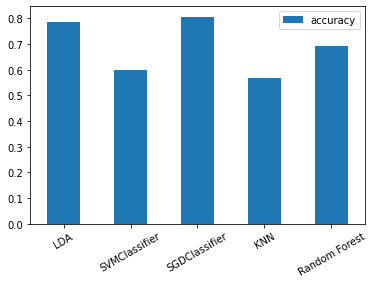

In [138]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=30, horizontalalignment='center');

**Hyperparamter Tuning**

In [209]:
#Hyperparameters
cv_lda=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'n_components':[1,2,3,4,5]   
}

grid_svm = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    }

grid_sgd = {
    'penalty': ['l2','l1','elasticnet'],
    'n_jobs': [-1],
    'max_iter': [20,50,100,500,1000],
    'loss': ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error',
            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'validation_fraction': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

grid_knn ={
    'leaf_size':np.arange(1,50),
    'n_neighbors':np.arange(1,30),
    'p':[1,2]
}



grid_rf = {
    'n_estimators': [20, 50, 100, 500, 1000],  
    'max_depth': np.arange(1, 100, 1),  
    'min_samples_split': [2, 10, 9], 
    'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
    'bootstrap': [True, False], 
    'random_state': [1, 2, 30, 42]
}


In [166]:
# Tune LinearDiscriminantAnalysis 

np.random.seed(42)

# Setup random hyperparameter search for LinearDiscriminantAnalysis
lda = RandomizedSearchCV(LinearDiscriminantAnalysis(),
                                param_distributions=grid_lda,
                                cv=10,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for LinearDiscriminantAnalysis 
lda.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


RandomizedSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_iter=20,
                   param_distributions={'n_components': [1, 2, 3, 4, 5],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   verbose=True)

In [167]:
# Find the best parameters
lda.best_params_

{'solver': 'svd', 'n_components': 1}

In [168]:
# Evaluate the randomized search LinearDiscriminantAnalysis Model
lda.score(X_test, y_test)

0.7866666666666666

In [170]:
lda_model=LinearDiscriminantAnalysis(solver= 'svd', n_components= 1)
lda_model.fit(X_train, y_train)
predict_lda = lda_model.predict(X_test)
predict_lda

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [159]:
# # Plot ROC curve and calculate the AUC(area under curve) metric
# plot_roc_curve(lda_model, X_test, y_test)

In [158]:
# #Confusion Matrix
# print(confusion_matrix(y_test, predict_lda))

# sns.set(font_scale=1.5)

# def plot_conf_mat(y_test, y_predicts):
#   """
#   Plot a confusion matrix using Seaborn's heatmap()
#   """
#   fig, ax = plt.subplots(figsize=(3,3))
#   ax = sns.heatmap(confusion_matrix(y_test,predict_lda),
#                   annot=True,
#                    cbar=False)
#   plt.xlabel("True label")
#   plt.ylabel("Predicted label")

# plot_conf_mat(y_test, predict_lda)

In [178]:
# Tune SVM 

np.random.seed(42)

# Setup random hyperparameter search for SVM
svm = RandomizedSearchCV(SVC(),
                        param_distributions=grid_svm,
                        cv=10,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for SVM 
svm.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'rbf', 'sigmoid',
                                                   'precomputed']},
                   verbose=True)

In [179]:
# Find the best parameters
svm.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}

In [181]:
# Evaluate the randomized search SVM Model
svm.score(X_test, y_test)

0.76

In [191]:
# Tune SGDClassifier 

np.random.seed(42)

# Setup random hyperparameter search for SGDClassifier
sgd = RandomizedSearchCV(SGDClassifier(),
                        param_distributions=grid_sgd,
                        cv=10,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for SGDClassifier 
sgd.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=SGDClassifier(), n_iter=20,
                   param_distributions={'loss': ['hinge', 'log_loss', 'log',
                                                 'modified_huber',
                                                 'squared_hinge', 'perceptron',
                                                 'squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [20, 50, 100, 500, 1000],
                                        'n_jobs': [-1],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'validation_fraction': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8,
                                       

In [193]:
# Find the best parameters
sgd.best_params_

{'validation_fraction': 0.8,
 'penalty': 'l1',
 'n_jobs': -1,
 'max_iter': 50,
 'loss': 'hinge'}

In [194]:
# Evaluate the randomized search SGDClassifier Model
sgd.score(X_test, y_test)

0.78

In [195]:
# Tune KNeighborsClassifier 

np.random.seed(42)

# Setup random hyperparameter search for KNeighborsClassifier
knn = RandomizedSearchCV(KNeighborsClassifier(),
                        param_distributions=grid_knn,
                        cv=10,
                        n_iter=20,
                        verbose=True)

#Fit random hyperparameter search model for KNeighborsClassifier 
knn.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   verbose=True)

In [196]:
# Find the best parameters
knn.best_params_

{'p': 2, 'n_neighbors': 7, 'leaf_size': 42}

In [197]:
# Evaluate the randomized search KNeighborsClassifier Model
knn.score(X_test, y_test)

0.5533333333333333

In [210]:
# Tune RandomForestClassifier 

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=grid_rf,
                        cv=10,
                        n_iter=200,
                        verbose=2,
                        n_jobs=-1)

#Fit random hyperparameter search model for KNeighborsClassifier 
rf.fit(X_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': [2, 10, 9],
                                        'n_estimators': [20, 50, 100, 500,
                                                         1000],
                          

In [211]:
# Find the best parameters
rf.best_params_ 

{'random_state': 30,
 'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 98,
 'bootstrap': False}

In [212]:
# Evaluate the randomized search KNeighborsClassifier Model
rf.score(X_test, y_test)

0.6733333333333333

In [213]:
model_scores

{'LDA': 0.7866666666666666,
 'SVMClassifier': 0.6,
 'SGDClassifier': 0.8066666666666666,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.6933333333333334}

In [214]:
model_rf = RandomForestClassifier(random_state= 30,n_estimators= 50,min_samples_split= 2,min_samples_leaf= 3,max_depth= 98,bootstrap= False)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

In [218]:
# Final Classification Report
print(classification_report(model_rf.predict(X_test),y_test)) 

              precision    recall  f1-score   support

           0       0.46      0.66      0.54        44
           1       0.83      0.68      0.75       106

    accuracy                           0.67       150
   macro avg       0.64      0.67      0.64       150
weighted avg       0.72      0.67      0.69       150



**Create dictionary of classifiers to train and predict on**


-------------- LinearDiscriminantAnalysis ---------------



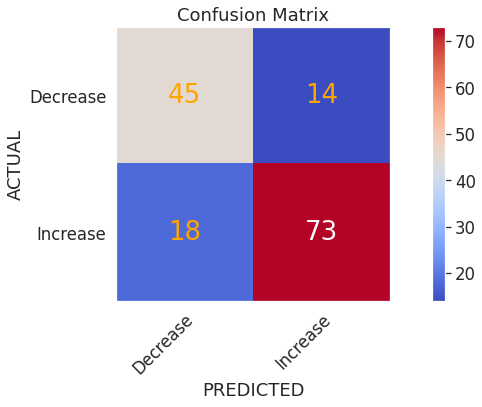

              precision    recall  f1-score   support

    Decrease       0.71      0.76      0.74        59
    Increase       0.84      0.80      0.82        91

    accuracy                           0.79       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.79      0.79      0.79       150


-------------- SVM Classification ---------------



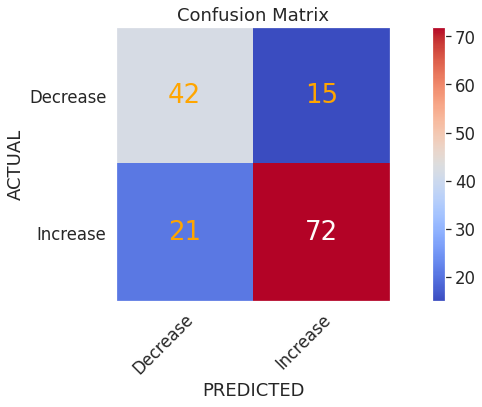

              precision    recall  f1-score   support

    Decrease       0.67      0.74      0.70        57
    Increase       0.83      0.77      0.80        93

    accuracy                           0.76       150
   macro avg       0.75      0.76      0.75       150
weighted avg       0.77      0.76      0.76       150


-------------- SGDClassifier ---------------



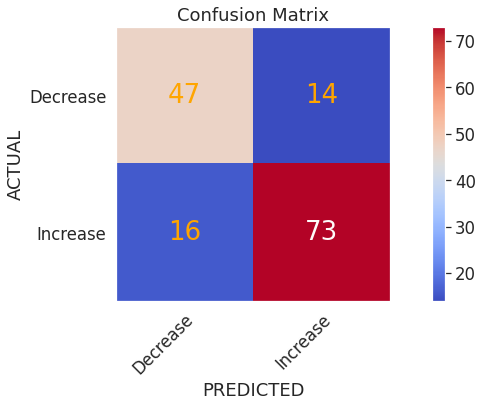

              precision    recall  f1-score   support

    Decrease       0.75      0.77      0.76        61
    Increase       0.84      0.82      0.83        89

    accuracy                           0.80       150
   macro avg       0.79      0.80      0.79       150
weighted avg       0.80      0.80      0.80       150


-------------- KNeighborsClassifier ---------------



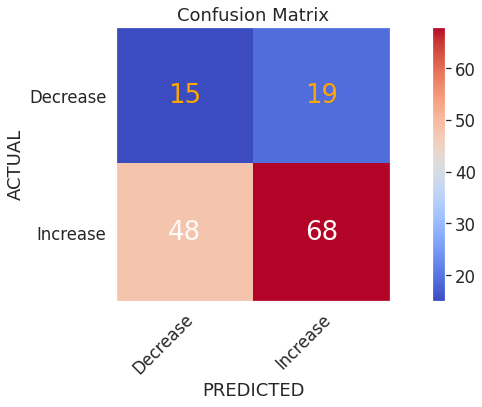

              precision    recall  f1-score   support

    Decrease       0.24      0.44      0.31        34
    Increase       0.78      0.59      0.67       116

    accuracy                           0.55       150
   macro avg       0.51      0.51      0.49       150
weighted avg       0.66      0.55      0.59       150


-------------- RandomForestClassifier ---------------



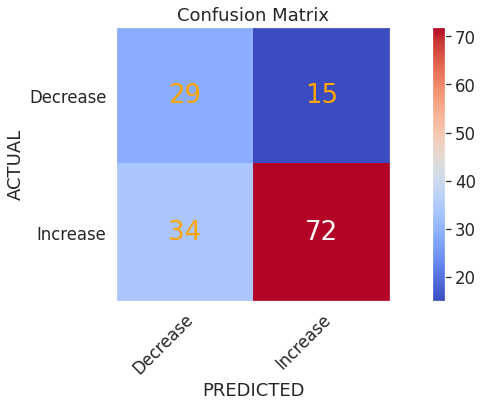

              precision    recall  f1-score   support

    Decrease       0.46      0.66      0.54        44
    Increase       0.83      0.68      0.75       106

    accuracy                           0.67       150
   macro avg       0.64      0.67      0.64       150
weighted avg       0.72      0.67      0.69       150



In [225]:
# test models
models = {  'LinearDiscriminantAnalysis':LinearDiscriminantAnalysis(solver='svd', n_components= 1),
            'SVM Classification': SVC(kernel='linear', gamma= 0.01, C= 10),
            'SGDClassifier': SGDClassifier(validation_fraction= 0.8, penalty= 'l1',n_jobs= -1,max_iter= 50, loss= 'hinge'),
            'KNeighborsClassifier':KNeighborsClassifier(p= 2, n_neighbors= 7, leaf_size= 42),
            # 'GaussianProcessClassifier': GaussianProcessClassifier(),
            'RandomForestClassifier': RandomForestClassifier(random_state= 30, n_estimators= 50, min_samples_split= 2, min_samples_leaf= 3, max_depth= 98, bootstrap= False)
            }

for model_name in models.keys():

    model = models[model_name]
    print('\n'+'--------------',model_name,'---------------'+'\n')
    model.fit(X_train,y_train)
    # Plot confusion matrix
    plot_confusion_matrix(model.predict(X_test),y_test, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    plt.show()
    # Final Classification Report
    print(classification_report(model.predict(X_test),y_test, target_names=['Decrease', 'Increase']))